### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from datetime import datetime, date
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

### Reading Data Sets

In [2]:
df_train = pd.read_csv('Consumer_Complaints_train.csv')
df_test = pd.read_csv('Consumer_Complaints_test.csv')

### Train Data

In [3]:
df_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


### Test Data

In [4]:
df_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


### Shape of Train and Test Data

In [5]:
df_train.shape, df_test.shape

((358810, 18), (119606, 17))

### Columns of Train and Test Data

In [6]:
df_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [7]:
df_test.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

### Data Types

In [8]:
data_types_train = pd.DataFrame(df_train.dtypes, columns = ['Train'])
data_types_test = pd.DataFrame(df_test.dtypes, columns = ['Test'])
data_types = pd.concat([data_types_train, data_types_test], axis = 1)
data_types

,Train,Test
Date received,object,object
Product,object,object
Sub-product,object,object
Issue,object,object
Sub-issue,object,object
Consumer complaint narrative,object,object
Company public response,object,object
Company,object,object
State,object,object
ZIP code,object,object


### Missing Values

In [9]:
missing_values_train = pd.DataFrame(df_train.isna().sum(), columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isna().sum(), columns = ['Test'])
missing_values = pd.concat([missing_values_train, missing_values_test], axis = 1)
missing_values

,Train,Test
Date received,0,0.0
Product,0,0.0
Sub-product,103786,34683.0
Issue,0,0.0
Sub-issue,219374,73250.0
Consumer complaint narrative,302630,100692.0
Company public response,290879,97146.0
Company,0,0.0
State,2903,936.0
ZIP code,2911,937.0


### Dropping Missing Values

In [10]:
columns_with_missing_values = ['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?']
df_train = df_train.drop(columns_with_missing_values, axis = 1)
df_test = df_test.drop(columns_with_missing_values, axis = 1)

### Extracting Date, Month and Year from Date Received Column

In [11]:
df_train['Year_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_test['Year_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_train['Month_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_test['Month_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_train['Day_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)
df_test['Day_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)

### Extracting Date, Month and Year From Date Sent to the Company Column

In [12]:
df_train['Year_Sent'] = df_train['Date sent to company'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_test['Year_Sent'] = df_test['Date sent to company'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_train['Month_Sent'] = df_train['Date sent to company'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_test['Month_Sent'] = df_test['Date sent to company'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_train['Day_Sent'] = df_train['Date sent to company'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)
df_test['Day_Sent'] = df_test['Date sent to company'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)

### Converting Dates from Object Type to Datetime Type

In [13]:
df_train['Date received'] = pd.to_datetime(df_train['Date received'])
df_test['Date received'] = pd.to_datetime(df_test['Date received'])
df_train['Date sent to company'] = pd.to_datetime(df_train['Date sent to company'])
df_test['Date sent to company'] = pd.to_datetime(df_test['Date sent to company'])

### Calculating the Number of Days the Complaint was with the Company

In [14]:
df_train['Days held'] = df_train['Date sent to company'] - df_train['Date received']
df_test['Days held'] = df_test['Date sent to company'] - df_test['Date received']

### Converting Days Held to Int

In [15]:
df_train['Days held'] = df_train['Days held'].astype('timedelta64[D]').astype(int)
df_test['Days held'] = df_test['Days held'].astype('timedelta64[D]').astype(int)

### Dropping Date Received and Date Sent to Company

In [16]:
df_train = df_train.drop(['Date received', 'Date sent to company'], axis = 1)
df_test = df_test.drop(['Date received', 'Date sent to company'], axis = 1)

### Dropping ZIP Code, Complaint ID

In [17]:
df_train = df_train.drop(['ZIP code', 'Complaint ID'], axis = 1)
df_test = df_test.drop(['ZIP code', 'Complaint ID'], axis = 1)

### Imputing Nulls in State by Mode

In [18]:
df_train['State'].mode(), df_test['State'].mode()

(0    CA
 dtype: object,
 0    CA
 dtype: object)

In [19]:
df_train['State'] = df_train['State'].replace(np.nan, 'CA')
df_test['State'] = df_test['State'].replace(np.nan, 'CA')

### Checking Missing Values  Data

In [20]:
missing_values_train = pd.DataFrame(df_train.isna().sum(), columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isna().sum(), columns = ['Test'])
missing_values = pd.concat([missing_values_train, missing_values_test], axis = 1)
missing_values

,Train,Test
Product,0,0.0
Issue,0,0.0
Company,0,0.0
State,0,0.0
Submitted via,0,0.0
Company response to consumer,0,0.0
Timely response?,0,0.0
Consumer disputed?,0,NaN
Year_Received,0,0.0
Month_Received,0,0.0


### Dropping Year Sent, Month Sent and Day Sent

In [21]:
df_train = df_train.drop(['Year_Sent', 'Month_Sent', 'Day_Sent'], axis = 1)
df_test = df_test.drop(['Year_Sent', 'Month_Sent', 'Day_Sent'], axis = 1)

### Categorizing Days into Weeks

In [22]:
week_train = []
for i in df_train['Day_Received']:
    if i < 8:
        week_train.append(1)
    elif i >= 8 and i < 16:
        week_train.append(2)
    elif i >=16 and i < 22:
        week_train.append(3)
    else:
        week_train.append(4)
df_train['Week_Received'] = week_train
week_test = []
for i in df_test['Day_Received']:
    if i < 8:
        week_test.append(1)
    elif i >= 8 and i < 16:
        week_test.append(2)
    elif i >=16 and i < 22:
        week_test.append(3)
    else:
        week_test.append(4)
df_test['Week_Received'] = week_test

### Dropping Day_Received

In [23]:
df_train = df_train.drop(['Day_Received'], axis = 1)
df_test = df_test.drop(['Day_Received'], axis = 1)

### Train Data

In [24]:
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,14,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,0,4


### Test Data

In [25]:
df_test.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Days held,Week_Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,0,4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,0,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,3,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,0,1


### Disputed Consumers Data

In [26]:
disputed_cons = df_train[df_train['Consumer disputed?'] == 'Yes']

### Number of Disputes

Text(0, 0.5, 'Count')

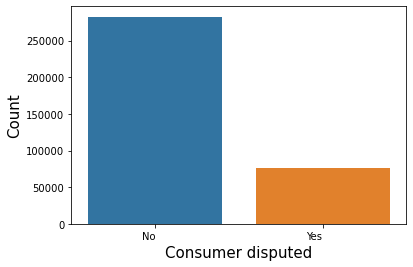

In [27]:
sns.countplot(x = 'Consumer disputed?', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Consumer disputed', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        Roughly 21% of the consumer have disputed.

### Products-wise Disputes

Text(0, 0.5, 'Count')

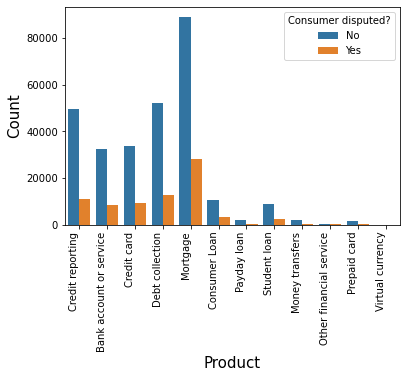

In [28]:
sns.countplot(x = 'Product', hue = 'Consumer disputed?', data = df_train)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        Roughly 37% consumer with mortgage have disputed.
        Approx. 54% consumer who have disputed are from mortgage or debt collection.
        68% consumer having disputes are from mortgage, debt collection and credit reporting.
        Adding credit card consumers and bank account or services consumer will make it 80% and 91% respectively.

### Top Issues with Highest Disputes

Text(0, 0.5, 'Count')

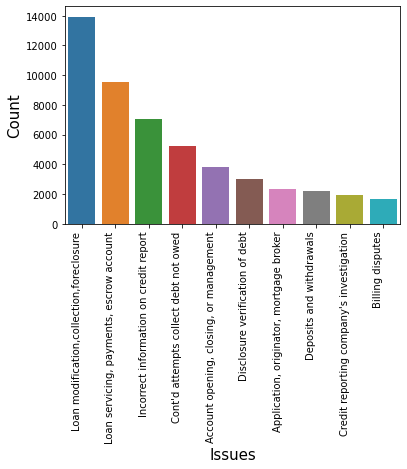

In [29]:
top_issues_disputes = disputed_cons['Issue'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = top_issues_disputes.index, y = top_issues_disputes.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Issues', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        66% disputes are from these 10 issues.

### State with Maximum Disputes

Text(0, 0.5, 'Count')

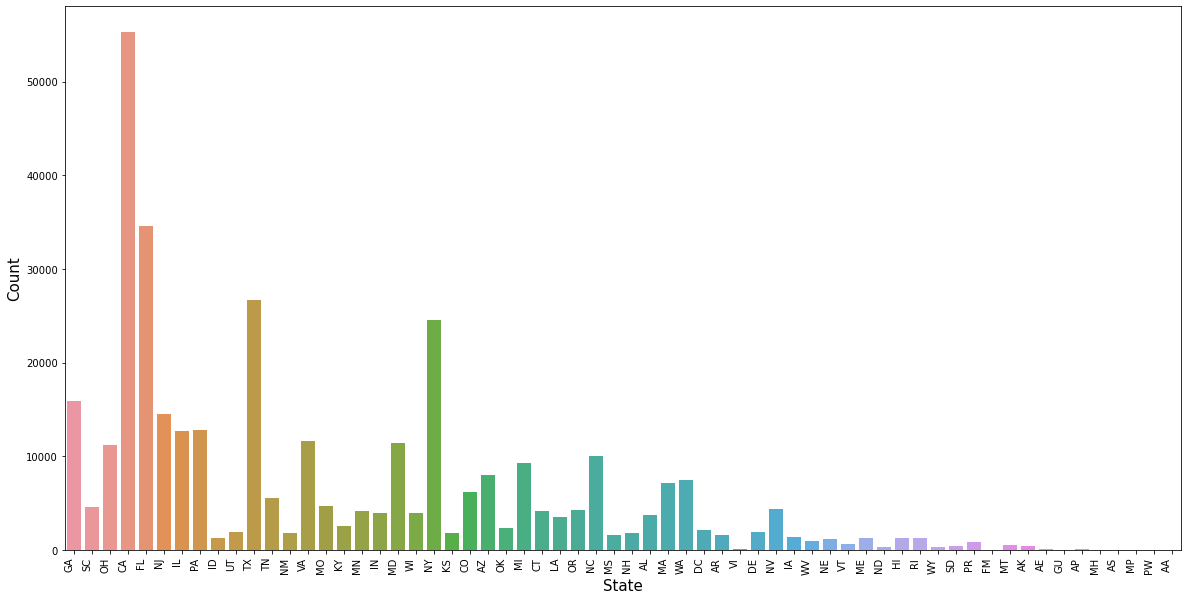

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = df_train['State'])
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        15% disputes from CA.
        25% disputes from CA and FL
        32% disputes from CA, FL and TX.
        38% disputes from CA, FL, TX and NY.
        43% disputes from CA, FL, TX, NY and GA.
        47% disputes from CA, FL, TX, NY, GA and NJ.
        50% disputes from CA, FL, TX, NY, GA, NJ and IL.
        54% disputes from CA, FL, TX, NY, GA, NJ, IL and VA.
        57% disputes from CA, FL, TX, NY, GA, NJ, IL, VA and PA.
        61% disputes from CA, FL, TX, NY, GA, NJ, IL, VA, PA and MD.

### Maximum Disputes Submitted Via

Text(0, 0.5, 'Count')

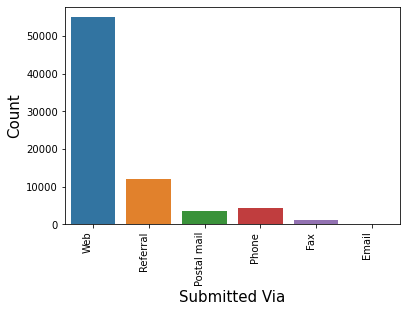

In [31]:
sns.countplot(x = 'Submitted via', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Submitted Via', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        72% disputes are submitted via web.
        88% disputes are submitted via web and referral.

### Company's Response to the Complaints

Text(0, 0.5, 'Count')

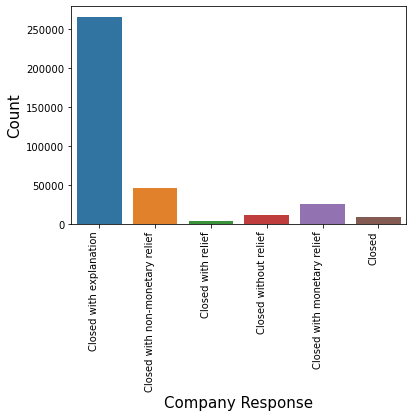

In [32]:
sns.countplot(x = 'Company response to consumer', data = df_train)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Company Response', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        74% complaints are closed with explanation.

### Company's Response Leading to Disputes

Text(0, 0.5, 'Count')

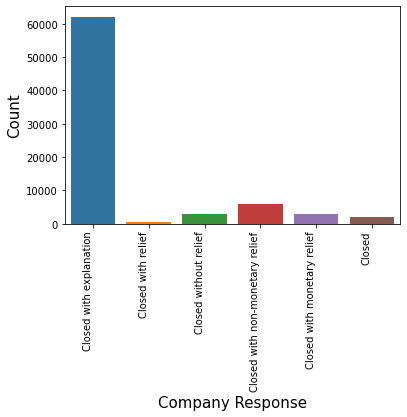

In [33]:
sns.countplot(x = 'Company response to consumer', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Company Response', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        82% disputes are closed with explanation at the initial stage.
        89% disputes are either closed with explanation or non-monetary relief in the earlier stage.

### Whether there are Disputes Instead of Timely Response

Text(0, 0.5, 'Count')

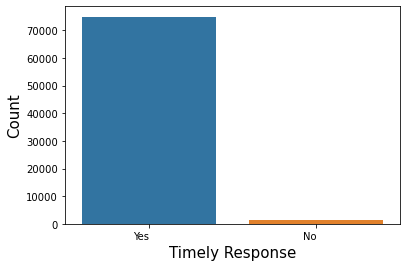

In [34]:
sns.countplot(x = 'Timely response?', data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Timely Response', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        98% disputes were timely repsonded at the intial stages.

### Year Wise Complaints

Text(0, 0.5, 'Count')

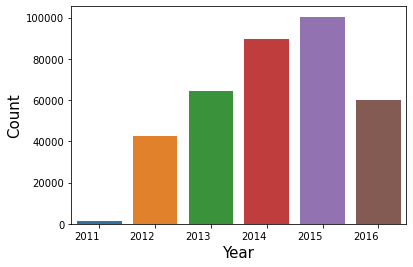

In [35]:
sns.countplot(x = 'Year_Received', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        28% complaints are raised in 2015.
        53% complaints are raised in 2014 and 2015.
        71% complaints are raised in 2013 to 2015.
        88% complaints are raised in 2013 to 2016.

### Year Wise Disputes

Text(0, 0.5, 'Count')

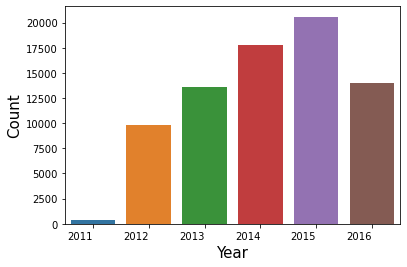

In [36]:
sns.countplot(x = 'Year_Received', data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        27% disputes are raised in 2015.
        50% disputes are raised in 2014 and 2015.
        69% disputes are raised in 2014 to 2016.
        87% disputes are raised in 2013 to 2016.

### Month Wise Complaints

Text(0, 0.5, 'Count')

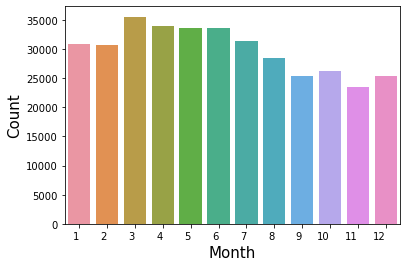

In [37]:
sns.countplot(x = 'Month_Received', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        64% complaints are raised in January to July.
        72% complaints are raised in January to August.

### Month Wise Disputes

Text(0, 0.5, 'Count')

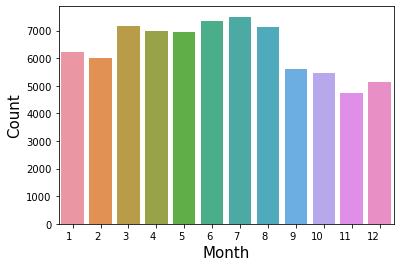

In [38]:
sns.countplot(x = 'Month_Received', data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        56% disputes are raised in March to August.
        73% disputes are raised in January to August.

### Week Wise Complaints

Text(0, 0.5, 'Count')

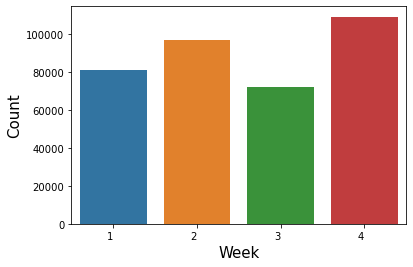

In [39]:
sns.countplot(x = 'Week_Received', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Week', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        30% complaints are in the 4th week of the month.
        50% complaints are in both the half of the month.

### Week Wise Disputes 

Text(0, 0.5, 'Count')

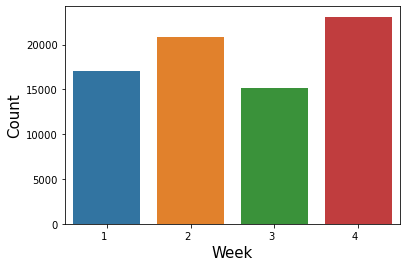

In [40]:
sns.countplot(x = 'Week_Received', data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Week', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        30% disputes are in the 4th week of the month.
        50% disputes are in both the half of the month.

### Top Companies with Highest Complaints

Text(0, 0.5, 'Count')

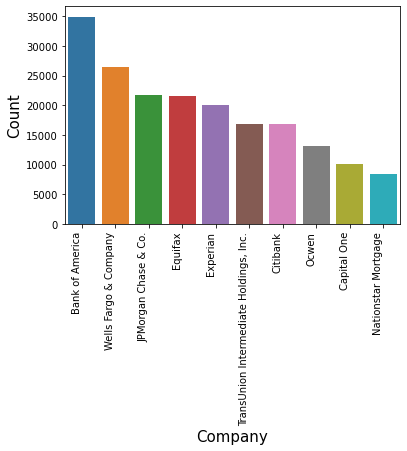

In [41]:
worst_company_complaints = df_train['Company'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = worst_company_complaints.index, y = worst_company_complaints.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        53% complaints are for these 10 companies.

### Top Companies with Highest Disputes

Text(0, 0.5, 'Count')

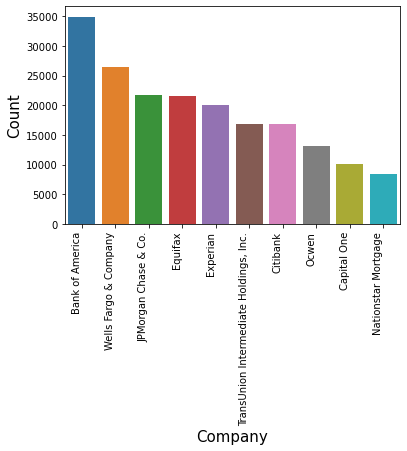

In [42]:
worst_company_disputes = disputed_cons['Company'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = worst_company_complaints.index, y = worst_company_complaints.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        53% disputes are for these 10 companies.

### Days Held Column Analysis

In [43]:
df_train['Days held'].describe()

count    358810.000000
mean          4.456339
std          16.741676
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days held, dtype: float64

In [44]:
df_test['Days held'].describe()

count    119606.000000
mean          4.443607
std          16.233377
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         832.000000
Name: Days held, dtype: float64

### Converting Negative Days Held to Zero

In [45]:
Days_held_train = []
for i in df_train['Days held']:
    if i < 0:
        Days_held_train.append(0)
    else:
        Days_held_train.append(i)
df_train['Days_held'] = Days_held_train
Days_held_test = []
for i in df_test['Days held']:
    if i < 0:
        Days_held_test.append(0)
    else:
        Days_held_test.append(i)
df_test['Days_held'] = Days_held_test

### Dropping Days Held with Negative Values


In [46]:
df_train = df_train.drop('Days held', axis = 1)
df_test = df_test.drop('Days held', axis = 1)

### NLP Pre-Processing

In [47]:
relevant_text_train = df_train['Issue']
relevant_text_test = df_test['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

### Concating Clean Data to Train and Test Data and Dropping Issue

In [48]:
df_train['Issues_cleaned'] = clean_data_train
df_test['Issues_cleaned'] = clean_data_test
df_train = df_train.drop('Issue', axis = 1)
df_test = df_test.drop('Issue', axis = 1)

### Dropping Unneccesary Columns for the Model Building

In [49]:
drop_cols = ['Company', 'State', 'Year_Received', 'Days_held']
df_train = df_train.drop(drop_cols, axis = 1)
df_test = df_test.drop(drop_cols, axis = 1)

### Changing Consumer Disputed Column to 0 and 1

In [50]:
df_train['Consumer disputed?'] = np.where(df_train['Consumer disputed?'] == "Yes", 1, 0)

### Creating Dummy Variables

In [51]:
dum_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']
df_train_dummies = pd.get_dummies(df_train[dum_cols], prefix_sep = '_', drop_first = True)
df_test_dummies = pd.get_dummies(df_test[dum_cols], prefix_sep = '_', drop_first = True)

### Concating Dummy Variables and Dropping the Original Columns

In [52]:
df_train = df_train.drop(dum_cols, axis = 1)
df_test = df_test.drop(dum_cols, axis = 1)
df_train = pd.concat([df_train, df_train_dummies], axis = 1)
df_test = pd.concat([df_test, df_test_dummies], axis = 1)

### Calculating TF-IDF

In [53]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df_train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


### Replacing Issues_cleaned by Vectorized Issues

In [54]:
df_train = df_train.drop('Issues_cleaned', axis = 1)
df_test = df_test.drop('Issues_cleaned', axis = 1)
df_train = pd.concat([df_train, issues_train], axis = 1)
df_test = pd.concat([df_test, issues_test], axis = 1)
Feature168 = [0] * 119606
df_test['Feature168'] = Feature168

### Train Data

In [55]:
df_train.head()

,Consumer disputed?,Month_Received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Feature58,Feature59,Feature60,Feature61,Feature62,Feature63,Feature64,Feature65,Feature66,Feature67,Feature68,Feature69,Feature70,Feature71,Feature72,Feature73,Feature74,Feature75,Feature76,Feature77,Feature78,Feature79,Feature80,Feature81,Feature82,Feature83,Feature84,Feature85,Feature86,Feature87,Feature88,Feature89,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118,Feature119,Feature120,Feature121,Feature122,Feature123,Feature124,Feature125,Feature126,Feature127,Feature128,Feature129,Feature130,Feature131,Feature132,Feature133,Feature134,Feature135,Feature136,Feature137,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147,Feature148,Feature149,Feature150,Feature151,Feature152,Feature153,Feature154,Feature155,Feature156,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,10,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399029,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469431,0.0,0.0,0.469773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.469773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.537342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.596349,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0

### Test Data

In [56]:
df_test.head()

,Month_Received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Feature58,Feature59,Feature60,Feature61,Feature62,Feature63,Feature64,Feature65,Feature66,Feature67,Feature68,Feature69,Feature70,Feature71,Feature72,Feature73,Feature74,Feature75,Feature76,Feature77,Feature78,Feature79,Feature80,Feature81,Feature82,Feature83,Feature84,Feature85,Feature86,Feature87,Feature88,Feature89,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118,Feature119,Feature120,Feature121,Feature122,Feature123,Feature124,Feature125,Feature126,Feature127,Feature128,Feature129,Feature130,Feature131,Feature132,Feature133,Feature134,Feature135,Feature136,Feature137,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147,Feature148,Feature149,Feature150,Feature151,Feature152,Feature153,Feature154,Feature155,Feature156,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.874274,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.437137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211085,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,6,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0,0.753491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.243968,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329255,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.291153,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423737,0.

### Shape of Train and Test Data

In [57]:
df_train.shape, df_test.shape

((358810, 193), (119606, 192))

### Scaling the Data Sets

In [58]:
df_train_scaled = pd.DataFrame(StandardScaler().fit_transform(df_train.drop('Consumer disputed?', axis = 1)), columns = df_test.columns)
df_test_scaled = pd.DataFrame(StandardScaler().fit_transform(df_test), columns = df_test.columns)

### Feature Selection

In [59]:
pca_columns = []
for i in range(df_train_scaled.shape[1]):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA()
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns=['Explained Info']).sort_values(by = 'Explained Info', ascending = False)
imp = []
for i in range(explained_info_train.shape[0]):
    imp.append(explained_info_train.head(i).sum())
explained_info_train_sum = pd.DataFrame()
explained_info_train_sum['Variable'] = pca_columns
explained_info_train_sum['Importance'] = imp
explained_info_train_sum.head(60)

,Variable,Importance
0,PC1,Explained Info 0.0 dtype: float64
1,PC2,Explained Info 0.035882 dtype: float64
2,PC3,Explained Info 0.069329 dtype: float64
3,PC4,Explained Info 0.10149 dtype: float64
4,PC5,Explained Info 0.128148 dtype: float64
5,PC6,Explained Info 0.153022 dtype: float64
6,PC7,Explained Info 0.177157 dtype: float64
7,PC8,Explained Info 0.199399 dtype: float64
8,PC9,Explained Info 0.221115 dtype: float64
9,PC10,Explained Info 0.242562 dtype: float64


        So 53 variables are making upto 80% of the information.

In [60]:
pca_columns = []
for i in range(53):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA(n_components = 53)
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)

In [61]:
df_pca_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,5.356880,-2.269681,-1.152916,-1.027731,0.161784,-0.915699,-0.481517,0.338754,0.086462,-0.101253,-0.200475,0.745147,-0.279958,-0.285442,-0.287519,0.255006,-0.172406,-0.041740,0.378210,0.030003,-0.012360,0.075601,-0.597453,0.007893,-0.385499,0.817500,0.042867,-0.429025,0.045354,-0.552522,-0.113529,0.145844,-0.615269,-0.017468,-0.049693,-0.069764,0.087004,0.084724,0.182951,-0.033409,0.013158,0.084556,-0.021976,-0.202135,-0.192055,0.582800,0.175299,-0.533698,0.259093,0.427891,-0.815497,-0.078846,0.169874
1,-0.147073,0.019733,-0.053081,0.799158,-0.439550,-0.153450,1.476489,-0.276707,-0.867866,0.109397,0.057347,-1.520841,0.052837,5.705520,-1.426030,1.829495,-0.342955,-0.624080,0.040034,0.106710,-0.196042,-0.003518,0.598290,0.023710,-0.222841,0.935549,-5.462817,1.427248,2.403315,-0.227196,0.190644,0.231843,0.620824,-0.004773,-0.313185,-0.103767,0.134877,0.319469,-1.130697,-0.865923,-0.177056,0.096084,0.079684,-0.079531,-0.301282,0.571580,-0.301911,-0.571712,0.286180,1.176490,-1.885761,-0.072554,0.112118
2,0.158073,-0.003475,-0.005908,0.810922,-0.615418,0.029282,1.093482,0.109844,-1.045433,0.089016,-0.166147,-0.942139,0.494370,0.447081,0.085969,-0.990157,0.324706,0.266854,-0.124795,0.155070,0.017803,-0.717747,0.188916,-0.012347,0.872096,0.281576,-0.315905,0.282563,-1.425604,0.552804,-0.448359,-0.161069,-0.552344,-0.002927,0.034544,0.106328,-0.018256,-0.316896,-0.257822,0.101817,-0.061479,-0.154870,-0.031145,0.057749,0.563485,-1.589625,1.288215,1.217589,-1.192638,-1.141952,2.688104,0.494529,-1.082600
3,-0.817872,-0.912092,3.535347,0.336404,-0.903587,-0.164758,-0.587551,-1.259142,0.288471,-0.152926,3.133877,0.100820,1.142233,0.489845,-0.442001,-0.492517,-0.307731,5.596478,1.059001,-2.754105,-2.784709,-0.970913,2.930821,-0.144969,-2.222659,0.322795,0.711421,-0.253099,1.057370,-0.315965,-0.900584,0.854942,-0.046348,-0.128274,0.721469,-0.066491,0.022612,-0.069108,-0.103205,0.009691,-0.031140,-0.043401,0.028148,-0.027047,-0.107048,0.032368,0.301446,-0.121456,-0.368864,-0.688397,1.047431,-0.371737,0.318213
4,-0.509846,-1.051604,3.915034,0.487316,-0.841674,-0.060906,-0.677080,-1.392885,0.719641,-0.292062,3.017269,0.055495,1.393560,0.417091,-0.485839,-0.491378,-0.368483,5.599104,1.243271,-2.794706,-2.637580,-0.822928,2.426905,-0.146175,-2.140293,0.096100,1.072657,-0.162695,0.804001,-0.101013,-0.606679,0.762930,0.349597,-0.141925,0.640080,-0.110758,0.043291,-0.000689,0.179468,-0.037332,0.017562,0.041597,0.055423,0.053097,-0.102629,0.173233,-0.155388,-0.201556,0.168884,0.668895,-0.837264,-0.177903,0.203442


In [62]:
pca_model = PCA(n_components = 53)
pca_model.fit(df_test_scaled)
df_pca_test = pd.DataFrame(pca_model.transform(df_test_scaled), columns = pca_columns)

### Spliting the Data Sets Into X and Y

In [63]:
X = df_pca_train
y = df_train['Consumer disputed?']

### Train, Validation and Test Data Sets

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 17)
X_test = df_pca_test

### Shapes of the Data Sets

In [65]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((251167, 53), (107643, 53), (251167,), (107643,), (119606, 53))

### Performance of Different Algorithms

In [66]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), XGBClassifier()]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'XGBClassifier']
accuracy_train = []
accuracy_val = []
for model in models:
    mod = model
    mod.fit(X_train, y_train)
    y_pred_train = mod.predict(X_train)
    y_pred_val = mod.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_val.append(accuracy_score(y_val, y_pred_val))
data = {'Modelling Algorithm' : model_names, 'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data.sort_values(by = 'Validation Accuracy', ascending = False)

,Modelling Algorithm,Train Accuracy,Validation Accuracy,Difference
0,LogisticRegression,0.787842,0.787390,0.057442
3,AdaBoostClassifier,0.787846,0.787390,0.057947
4,GradientBoostingClassifier,0.787846,0.787390,0.057947
6,XGBClassifier,0.788722,0.787158,0.198384
2,RandomForestClassifier,0.800786,0.775694,3.133447
1,DecisionTreeClassifier,0.800790,0.775508,3.157131
5,KNeighborsClassifier,0.763671,0.748994,1.921877


        LogisticRegression is the best model to build the model.

### Final Model and Prediction

In [67]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns = ['Prediction'])
y_pred_test.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


### Exporting Predictions to CSV

In [68]:
y_pred_test.to_csv('Prediction.csv')